## Data Collection..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel("marketing_campaign.xlsx")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [5]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [6]:
df.duplicated()
df.duplicated().sum()

np.int64(0)

## Data Cleaning and Preprocesssing..

In [7]:
df.columns=df.columns.str.lower()

In [8]:
df["income"]=df["income"].fillna(df["income"].median())

In [9]:
df.isnull().sum()

,0
id,0
year_birth,0
education,0
marital_status,0
income,0
kidhome,0
teenhome,0
dt_customer,0
recency,0
mntwines,0


In [10]:
df['dt_customer'] = pd.to_datetime(df['dt_customer'])
reference_date = pd.to_datetime('2026-01-12')


In [11]:
df['customer_tenure'] = (reference_date - df['dt_customer']).dt.days

In [12]:
df[["dt_customer","customer_tenure"]].head()

,dt_customer,customer_tenure
0,2012-09-04,4878
1,2014-03-08,4328
2,2013-08-21,4527
3,2014-02-10,4354
4,2014-01-19,4376


In [13]:
df.drop("id",axis=1,inplace=True)

In [14]:
df.describe()

,year_birth,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,customer_tenure
count,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,1968.805804,52237.975446,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,4568.582143
min,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,4215.000000
25%,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,4395.750000
50%,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,4570.500000
75%,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,4744.000000
max,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,4914.000000
std,11.984069,25037.955891,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,202.122512


In [15]:
income_col = 'income'
spending_cols = [
    'mntwines', 'mntfruits', 'mntmeatproducts',
    'mntfishproducts', 'mntsweetproducts', 'mntgoldprods'
]


In [16]:
def iqr_capping(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df


In [17]:
cols_to_treat = [income_col] + spending_cols
df = iqr_capping(df, cols_to_treat)


df[cols_to_treat].describe()


,income,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51865.874554,302.112946,21.679018,150.873214,32.115848,21.937946,39.487723
std,20936.104821,331.057356,27.257348,178.816658,40.361485,27.540334,39.927508
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35538.750000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,51381.500000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,68289.750000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,117416.250000,1225.000000,81.000000,556.000000,120.500000,81.000000,126.500000


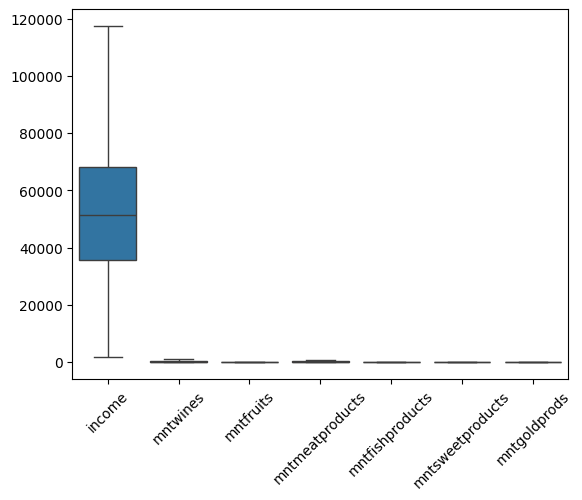

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df[cols_to_treat])
plt.xticks(rotation=45)
plt.show()


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_birth           2240 non-null   int64         
 1   education            2240 non-null   object        
 2   marital_status       2240 non-null   object        
 3   income               2240 non-null   float64       
 4   kidhome              2240 non-null   int64         
 5   teenhome             2240 non-null   int64         
 6   dt_customer          2240 non-null   datetime64[ns]
 7   recency              2240 non-null   int64         
 8   mntwines             2240 non-null   int64         
 9   mntfruits            2240 non-null   int64         
 10  mntmeatproducts      2240 non-null   int64         
 11  mntfishproducts      2240 non-null   float64       
 12  mntsweetproducts     2240 non-null   int64         
 13  mntgoldprods         2240 non-nul

In [20]:
df.head()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,customer_tenure
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,81,...,0,0,0,0,0,0,3,11,1,4878
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,4328
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,4527
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,3,11,0,4354
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,4376


# Feature Engineering & Exloaration Data Analysis...

In [21]:
df["total_spending"]=df[spending_cols].sum(axis=1)


In [22]:
df['total_children'] = df['kidhome'] + df['teenhome']


In [23]:
df['family_size'] = df['total_children'] + 2


In [24]:
campaign_cols = [
    'acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3',
    'acceptedcmp4', 'acceptedcmp5', 'response'
]

df['total_accepted_campaigns'] = df[campaign_cols].sum(axis=1)


In [25]:
df[[
    'total_spending', 'total_children',
    'family_size', 'total_accepted_campaigns'
]].head()


,total_spending,total_children,family_size,total_accepted_campaigns
0,1551.5,0,2,1
1,27.0,2,4,0
2,776.0,0,2,0
3,53.0,1,3,0
4,422.0,1,3,0


In [26]:
df[['total_spending', 'total_children',
    'family_size', 'total_accepted_campaigns']].isnull().sum()


,0
total_spending,0
total_children,0
family_size,0
total_accepted_campaigns,0


In [27]:
eda_cols = [
    'income',
    'recency',
    'total_spending',
    'numwebpurchases',
    'numcatalogpurchases',
    'numstorepurchases'
]


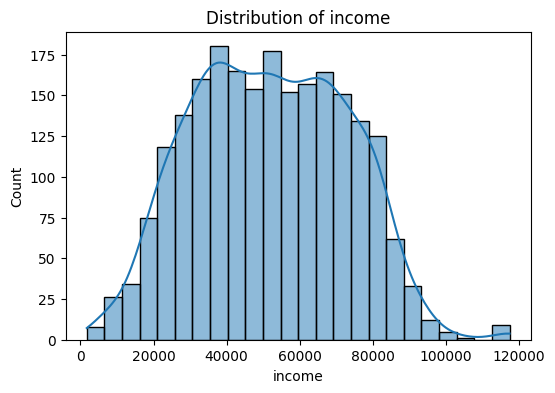

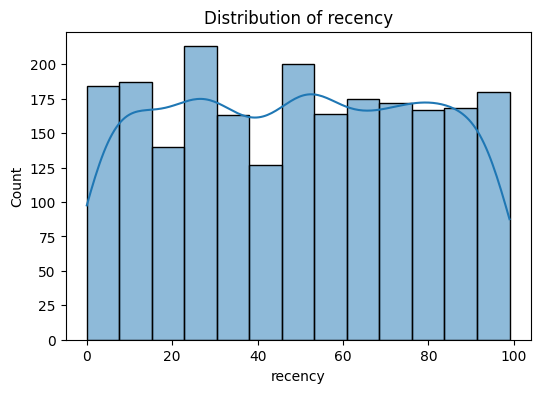

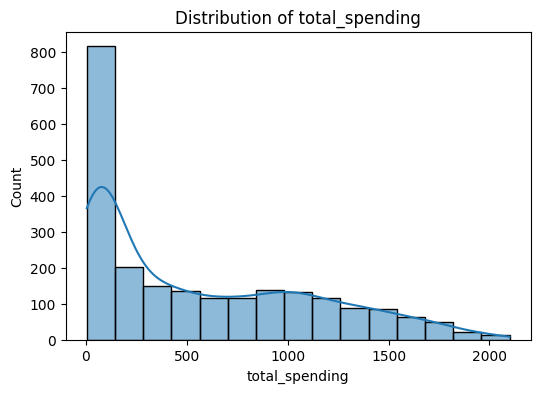

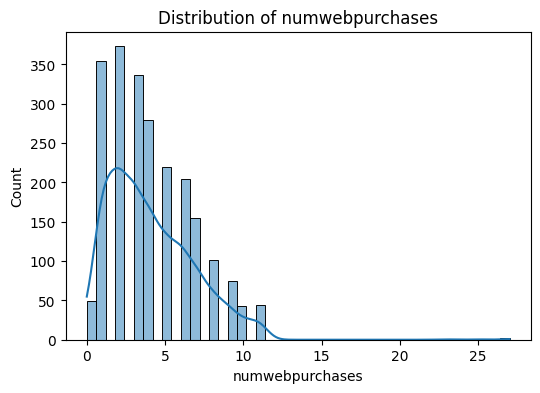

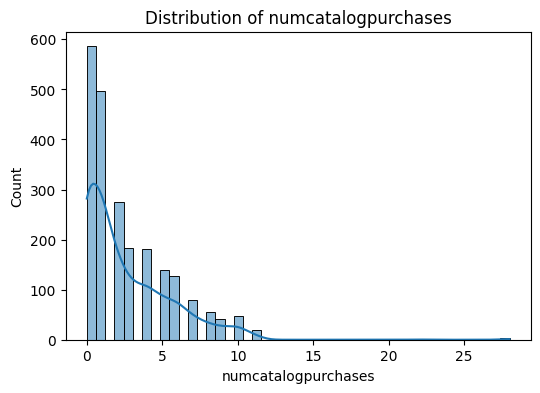

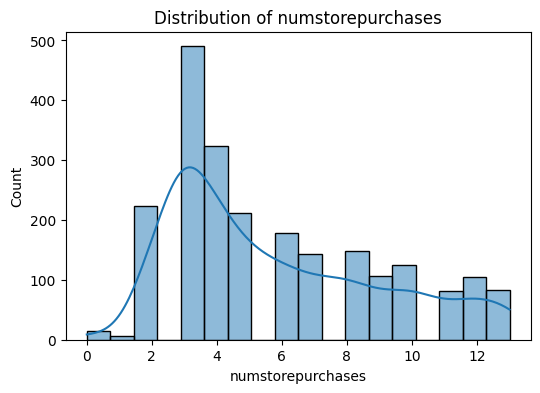

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in eda_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [29]:
df[eda_cols].describe()


,income,recency,total_spending,numwebpurchases,numcatalogpurchases,numstorepurchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51865.874554,49.109375,568.206696,4.084821,2.662054,5.790179
std,20936.104821,28.962453,547.036742,2.778714,2.923101,3.250958
min,1730.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,35538.750000,24.000000,68.750000,2.000000,0.000000,3.000000
50%,51381.500000,49.000000,395.000000,4.000000,2.000000,5.000000
75%,68289.750000,74.000000,990.500000,6.000000,4.000000,8.000000
max,117416.250000,99.000000,2099.500000,27.000000,28.000000,13.000000


In [30]:
df[eda_cols].skew()

,0
income,0.090027
recency,-0.001987
total_spending,0.753781
numwebpurchases,1.382794
numcatalogpurchases,1.880989
numstorepurchases,0.702237


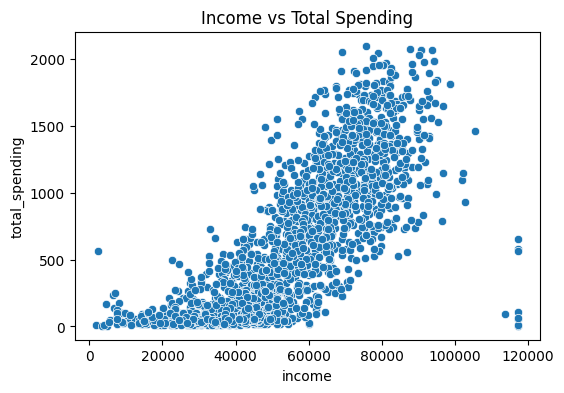

In [31]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='income', y='total_spending', data=df)
plt.title('Income vs Total Spending')
plt.show()


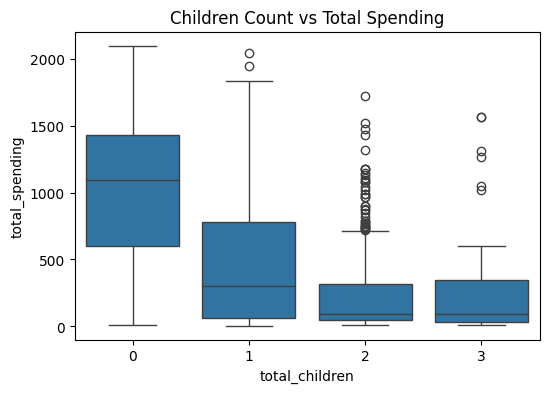

In [32]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='total_children', y='total_spending', data=df)
plt.title('Children Count vs Total Spending')
plt.show()


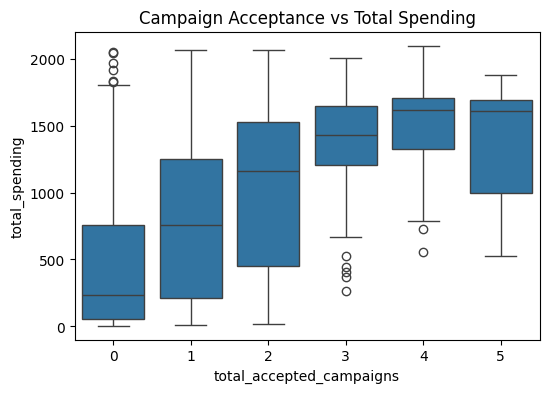

In [33]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='total_accepted_campaigns', y='total_spending', data=df)
plt.title('Campaign Acceptance vs Total Spending')
plt.show()


In [34]:
corr_cols = [
    'income',
    'recency',
    'customer_tenure',
    'total_spending',
    'total_children',
    'numwebpurchases',
    'numcatalogpurchases',
    'numstorepurchases',
    'numwebvisitsmonth',
    'total_accepted_campaigns'
]


In [35]:
corr_matrix = df[corr_cols].corr()


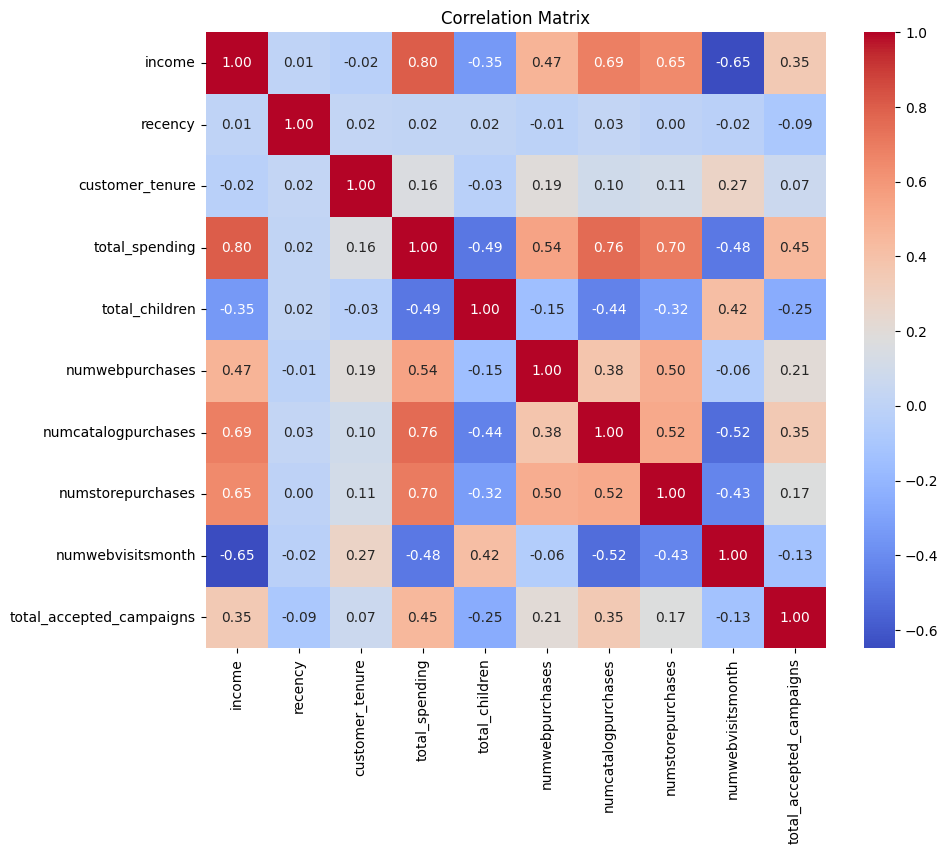

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Model Building & Evaluation...


In [37]:
from sklearn.preprocessing import StandardScaler

# Select the relevant features for clustering
clustering_features = [
    'income',
    'recency',
    'customer_tenure',
    'total_spending',
    'total_children',
    'numwebpurchases',
    'numcatalogpurchases',
    'numstorepurchases',
    'numwebvisitsmonth',
    'total_accepted_campaigns'
]
X = df[clustering_features]

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Selected features (first 5 rows of unscaled data):")
print(X.head())
print("\nScaled features (first 5 rows):")
print(X_scaled[:5])

Selected features (first 5 rows of unscaled data):
    income  recency  customer_tenure  total_spending  total_children  \
0  58138.0       58             4878          1551.5               0   
1  46344.0       38             4328            27.0               2   
2  71613.0       26             4527           776.0               0   
3  26646.0       26             4354            53.0               1   
4  58293.0       94             4376           422.0               1   

   numwebpurchases  numcatalogpurchases  numstorepurchases  numwebvisitsmonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   total_accepted_campaigns  

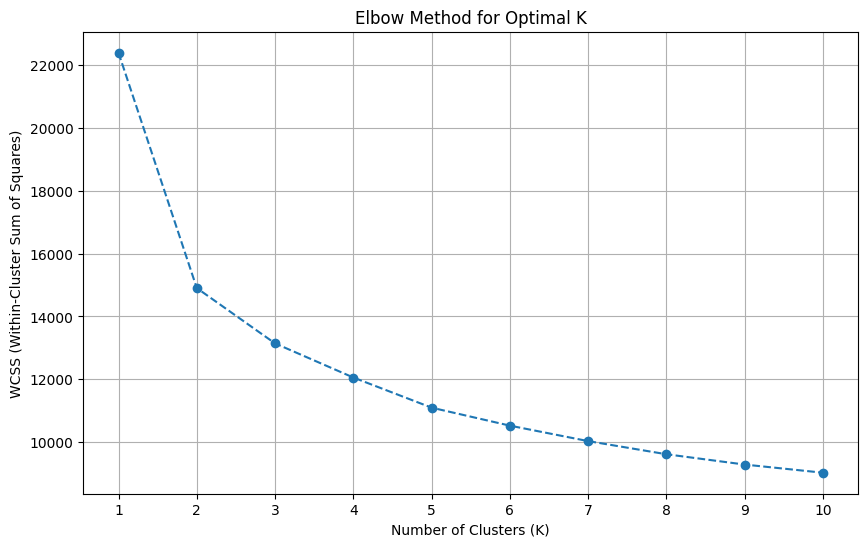

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [39]:
optimal_k = 3 # Based on visual inspection of the elbow plot

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

print(f"K-Means clustering performed with k = {optimal_k} clusters.")
print("Cluster distribution:")
print(df['kmeans_cluster'].value_counts())
print(df.head())

K-Means clustering performed with k = 3 clusters.
Cluster distribution:
kmeans_cluster
2    1060
1     657
0     523
Name: count, dtype: int64
   year_birth   education marital_status   income  kidhome  teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  dt_customer  recency  mntwines  mntfruits  ...  complain  z_costcontact  \
0  2012-09-04       58       635         81  ...         0              3   
1  2014-03-08       38        11          1  ...         0              3   
2  2013-08-21       26       426         49  ...         0              3   
3  2014-02-10       26        11          4  ...         0              3   
4  2014-01-19       94       173       

In [40]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Get K-Means cluster labels
kmeans_labels = df['kmeans_cluster']

# Calculate Silhouette Score
silhouette = silhouette_score(X_scaled, kmeans_labels)

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, kmeans_labels)

# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaled, kmeans_labels)

print(f"K-Means Clustering Evaluation (k={optimal_k}):")
print(f"  Silhouette Score: {silhouette:.3f}")
print(f"  Davies-Bouldin Index: {davies_bouldin:.3f}")
print(f"  Calinski-Harabasz Index: {calinski_harabasz:.3f}")

K-Means Clustering Evaluation (k=3):
  Silhouette Score: 0.233
  Davies-Bouldin Index: 1.721
  Calinski-Harabasz Index: 787.794


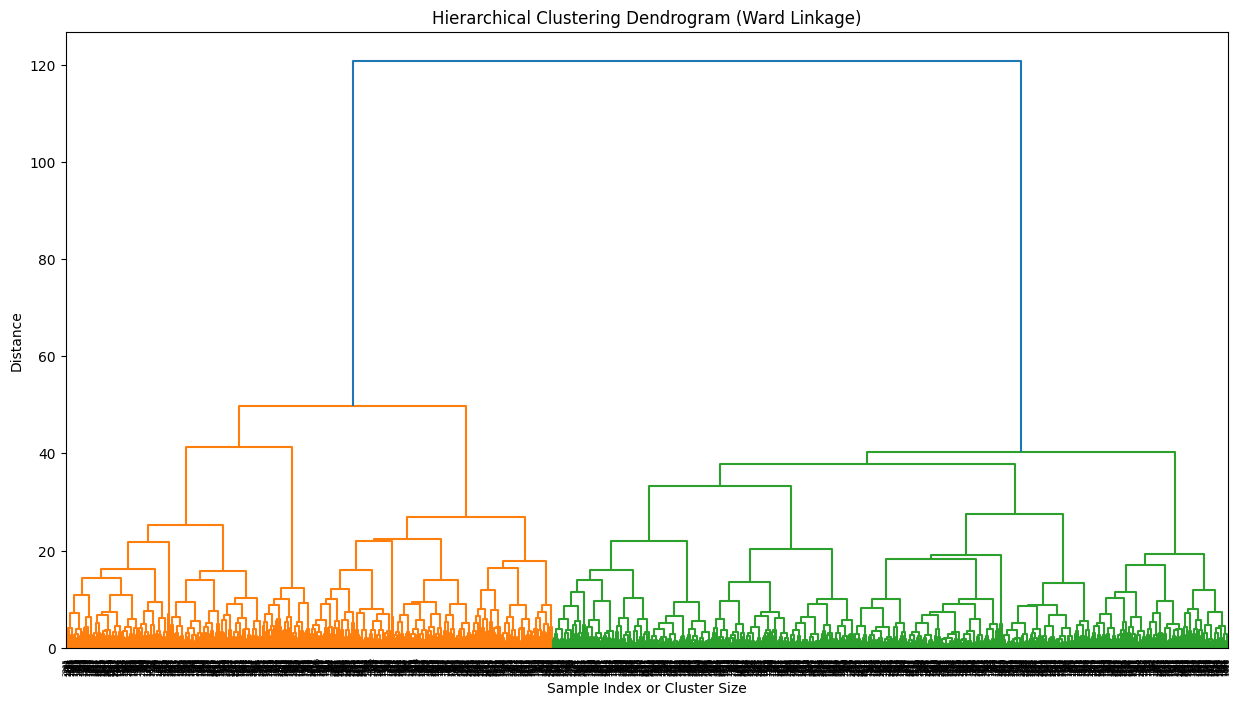

Dendrogram generated using 'ward' linkage.


In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate the linkage matrix using 'ward' method
linked_ward = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(
    linked_ward,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True
)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

print("Dendrogram generated using 'ward' linkage.")

In [42]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Hierarchical Clustering with 'ward' linkage and 3 clusters
n_clusters_hierarchical = 3 # Chosen based on dendrogram and K-Means result
hierarchical_clustering_ward = AgglomerativeClustering(
    n_clusters=n_clusters_hierarchical,
    linkage='ward'
)
df['hierarchical_cluster_ward'] = hierarchical_clustering_ward.fit_predict(X_scaled)

print(f"Hierarchical Clustering (Ward linkage) performed with {n_clusters_hierarchical} clusters.")
print("Cluster distribution:")
print(df['hierarchical_cluster_ward'].value_counts())
print(df.head())

Hierarchical Clustering (Ward linkage) performed with 3 clusters.
Cluster distribution:
hierarchical_cluster_ward
1    1302
0     470
2     468
Name: count, dtype: int64
   year_birth   education marital_status   income  kidhome  teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  dt_customer  recency  mntwines  mntfruits  ...  z_costcontact  z_revenue  \
0  2012-09-04       58       635         81  ...              3         11   
1  2014-03-08       38        11          1  ...              3         11   
2  2013-08-21       26       426         49  ...              3         11   
3  2014-02-10       26        11          4  ...              3         11   
4  2014

In [43]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Get Hierarchical cluster labels (Ward linkage)
hierarchical_labels_ward = df['hierarchical_cluster_ward']

# Calculate Silhouette Score
silhouette_hierarchical_ward = silhouette_score(X_scaled, hierarchical_labels_ward)

# Calculate Davies-Bouldin Index
davies_bouldin_hierarchical_ward = davies_bouldin_score(X_scaled, hierarchical_labels_ward)

# Calculate Calinski-Harabasz Index
calinski_harabasz_hierarchical_ward = calinski_harabasz_score(X_scaled, hierarchical_labels_ward)

print(f"Hierarchical Clustering Evaluation (Ward linkage, k={n_clusters_hierarchical}):")
print(f"  Silhouette Score: {silhouette_hierarchical_ward:.3f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_hierarchical_ward:.3f}")
print(f"  Calinski-Harabasz Index: {calinski_harabasz_hierarchical_ward:.3f}")

Hierarchical Clustering Evaluation (Ward linkage, k=3):
  Silhouette Score: 0.233
  Davies-Bouldin Index: 1.983
  Calinski-Harabasz Index: 687.072


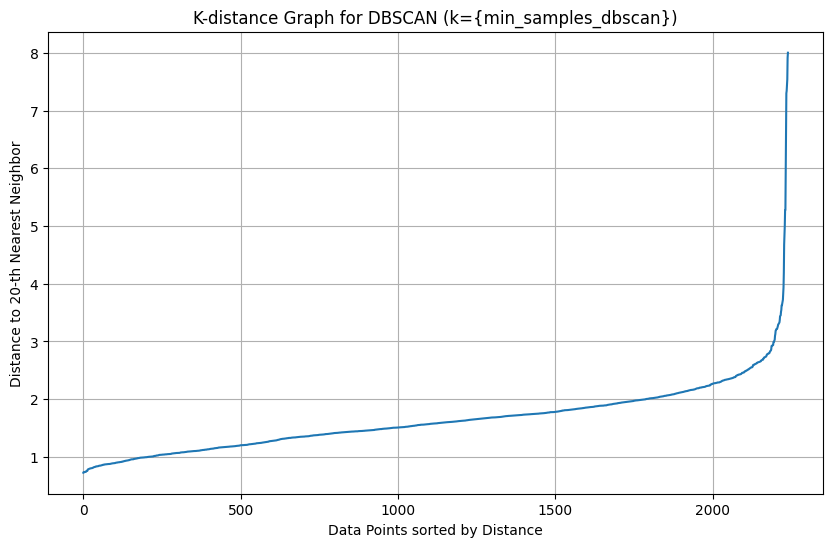

K-distance graph generated to help determine 'eps' for DBSCAN. Using k=20 for nearest neighbors.


In [44]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Determine k for k-distance graph (typically 2 * number of features)
# or a suitable min_samples value for DBSCAN. Let's use 2 * number of features as a starting point.
min_samples_dbscan = 2 * X_scaled.shape[1] # k for k-distance graph

# Calculate distances to the nearest neighbors
neigh = NearestNeighbors(n_neighbors=min_samples_dbscan)
neigh.fit(X_scaled)
distances, indices = neigh.kneighbors(X_scaled)

# Sort distances and plot
distances = np.sort(distances[:, min_samples_dbscan-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph for DBSCAN (k={min_samples_dbscan})')
plt.xlabel('Data Points sorted by Distance')
plt.ylabel(f'Distance to {min_samples_dbscan}-th Nearest Neighbor')
plt.grid(True)
plt.show()

print(f"K-distance graph generated to help determine 'eps' for DBSCAN. Using k={min_samples_dbscan} for nearest neighbors.")

In [45]:
from sklearn.cluster import DBSCAN

# Choose eps based on the K-distance graph. Assuming an elbow around 1.2-1.5.
# For demonstration, let's pick 1.2. (In a real scenario, this would be determined visually).
eps_dbscan = 1.2

# min_samples was already determined from the k-distance graph step
# min_samples_dbscan = 2 * X_scaled.shape[1] = 20

dbscan = DBSCAN(eps=eps_dbscan, min_samples=min_samples_dbscan)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

print(f"DBSCAN clustering performed with eps={eps_dbscan} and min_samples={min_samples_dbscan}.")
print("Cluster distribution:")
print(df['dbscan_cluster'].value_counts())
print(df.head())

DBSCAN clustering performed with eps=1.2 and min_samples=20.
Cluster distribution:
dbscan_cluster
-1    1435
 1     538
 0     244
 2      23
Name: count, dtype: int64
   year_birth   education marital_status   income  kidhome  teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  dt_customer  recency  mntwines  mntfruits  ...  z_revenue  response  \
0  2012-09-04       58       635         81  ...         11         1   
1  2014-03-08       38        11          1  ...         11         0   
2  2013-08-21       26       426         49  ...         11         0   
3  2014-02-10       26        11          4  ...         11         0   
4  2014-01-19       94       173  

In [46]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Get DBSCAN cluster labels
dbscan_labels = df['dbscan_cluster']

# Filter out noise points for Silhouette and Davies-Bouldin scores
# These metrics require at least two clusters and are not well-defined for noise points.
# Calinski-Harabasz can be calculated with noise, but often it's more meaningful to evaluate actual clusters.
valid_points_mask = dbscan_labels != -1
X_scaled_filtered = X_scaled[valid_points_mask]
dbscan_labels_filtered = dbscan_labels[valid_points_mask]

# Check if there are at least 2 clusters for silhouette and davies_bouldin score
if len(np.unique(dbscan_labels_filtered)) > 1:
    # Calculate Silhouette Score
    silhouette_dbscan = silhouette_score(X_scaled_filtered, dbscan_labels_filtered)

    # Calculate Davies-Bouldin Index
    davies_bouldin_dbscan = davies_bouldin_score(X_scaled_filtered, dbscan_labels_filtered)

    print(f"DBSCAN Clustering Evaluation (eps={eps_dbscan}, min_samples={min_samples_dbscan}):")
    print(f"  Silhouette Score (excluding noise): {silhouette_dbscan:.3f}")
    print(f"  Davies-Bouldin Index (excluding noise): {davies_bouldin_dbscan:.3f}")
else:
    print(f"DBSCAN Clustering Evaluation (eps={eps_dbscan}, min_samples={min_samples_dbscan}):")
    print("  Silhouette Score: Not applicable (fewer than 2 valid clusters after noise removal)")
    print("  Davies-Bouldin Index: Not applicable (fewer than 2 valid clusters after noise removal)")

# Calinski-Harabasz Index can be calculated with noise points or filtered, let's do both.
# For consistency, we'll calculate on the filtered data if enough clusters exist.
# If not, we'll indicate it.
if len(np.unique(dbscan_labels_filtered)) > 1:
    calinski_harabasz_dbscan = calinski_harabasz_score(X_scaled_filtered, dbscan_labels_filtered)
    print(f"  Calinski-Harabasz Index (excluding noise): {calinski_harabasz_dbscan:.3f}")
else:
    print("  Calinski-Harabasz Index: Not applicable (fewer than 2 valid clusters after noise removal)")


DBSCAN Clustering Evaluation (eps=1.2, min_samples=20):
  Silhouette Score (excluding noise): 0.152
  Davies-Bouldin Index (excluding noise): 1.818
  Calinski-Harabasz Index (excluding noise): 114.844


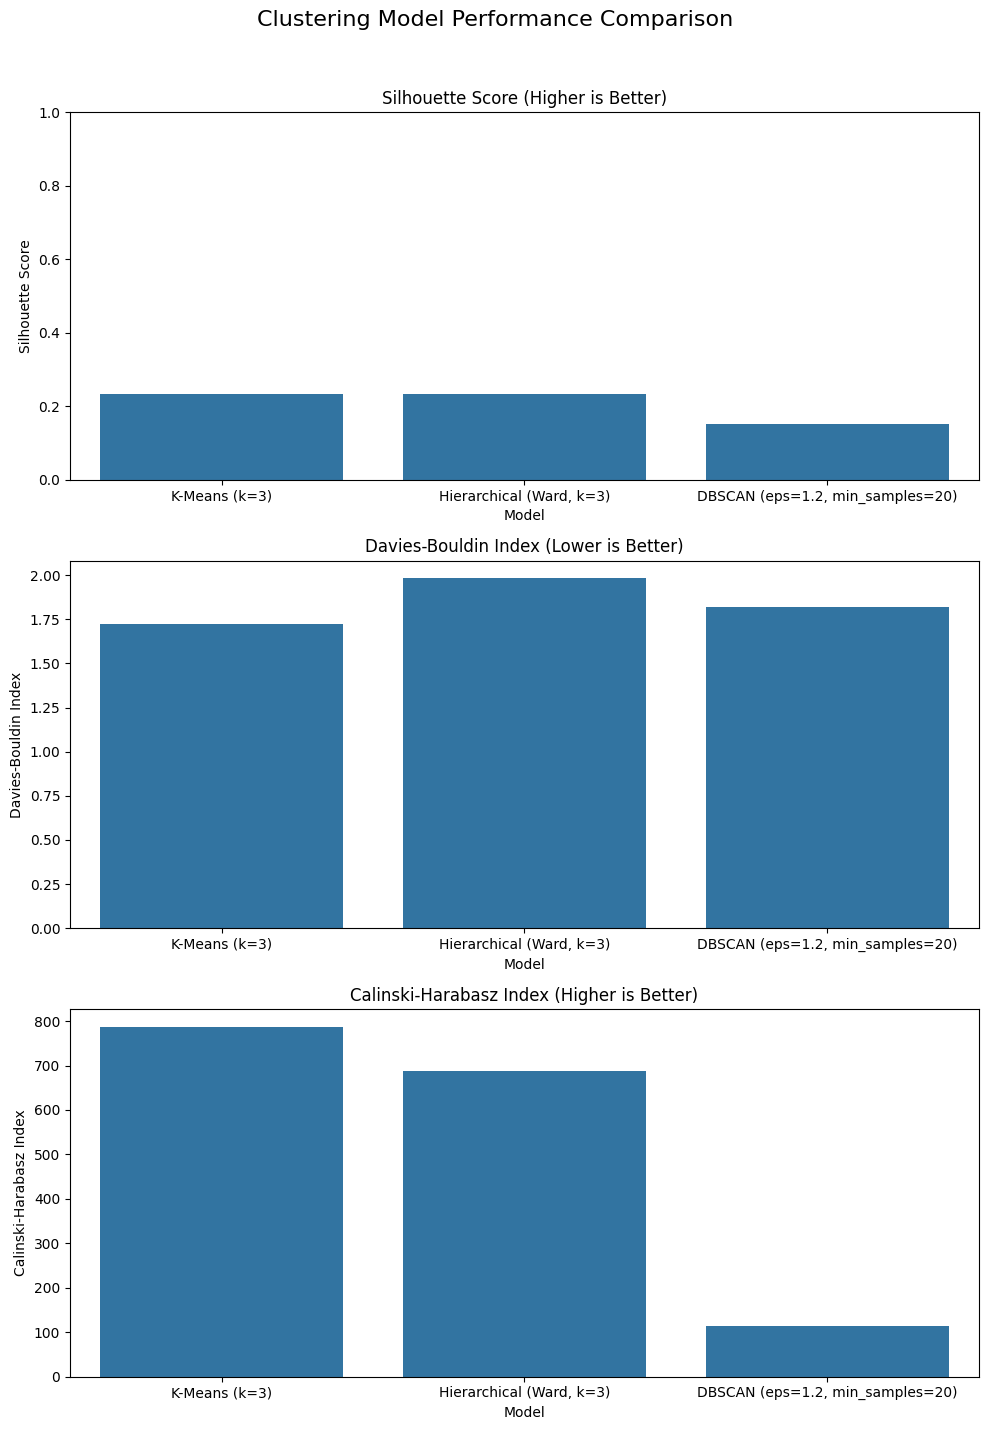

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for plotting
metrics_data = {
    'Model': ['K-Means (k=3)', 'Hierarchical (Ward, k=3)', 'DBSCAN (eps=1.2, min_samples=20)'],
    'Silhouette Score': [silhouette, silhouette_hierarchical_ward, silhouette_dbscan],
    'Davies-Bouldin Index': [davies_bouldin, davies_bouldin_hierarchical_ward, davies_bouldin_dbscan],
    'Calinski-Harabasz Index': [calinski_harabasz, calinski_harabasz_hierarchical_ward, calinski_harabasz_dbscan]
}

metrics_df = pd.DataFrame(metrics_data)

# Set up the plots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle('Clustering Model Performance Comparison', fontsize=16)

# Plot Silhouette Score
sns.barplot(x='Model', y='Silhouette Score', data=metrics_df, ax=axes[0])
axes[0].set_title('Silhouette Score (Higher is Better)')
axes[0].set_ylim(0, 1) # Silhouette score range is -1 to 1

# Plot Davies-Bouldin Index
sns.barplot(x='Model', y='Davies-Bouldin Index', data=metrics_df, ax=axes[1])
axes[1].set_title('Davies-Bouldin Index (Lower is Better)')

# Plot Calinski-Harabasz Index
sns.barplot(x='Model', y='Calinski-Harabasz Index', data=metrics_df, ax=axes[2])
axes[2].set_title('Calinski-Harabasz Index (Higher is Better)')

plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout to prevent title overlap
plt.show()

# Hyperparameter Tuning...


In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import itertools

# 1. Define the parameter grid for K-Means
param_grid = {
    'n_clusters': range(2, 6),  # from 2 to 5
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500],
    'n_init': [10, 20] # n_init is now an argument for KMeans constructor in newer sklearn versions
}

# 2. Initialize variables to keep track of the best Silhouette Score and parameters
best_silhouette_score = -1
best_params = None
best_davies_bouldin_score = None
best_calinski_harabasz_score = None

print("Starting K-Means Hyperparameter Tuning...")

# 3. Iterate through all combinations of parameters
for n_clusters, init, max_iter, n_init in itertools.product(
    param_grid['n_clusters'],
    param_grid['init'],
    param_grid['max_iter'],
    param_grid['n_init']
):
    # 4a. Instantiate a KMeans model with the current parameters
    kmeans = KMeans(
        n_clusters=n_clusters,
        init=init,
        max_iter=max_iter,
        n_init=n_init,  # n_init is passed directly
        random_state=42
    )

    # 4b. Fit the KMeans model to the X_scaled data
    kmeans.fit(X_scaled)

    # 4c. Predict the cluster labels
    cluster_labels = kmeans.labels_

    # 4d. Calculate evaluation metrics
    silhouette = silhouette_score(X_scaled, cluster_labels)
    davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(X_scaled, cluster_labels)

    # 4e. Compare and update best scores
    if silhouette > best_silhouette_score:
        best_silhouette_score = silhouette
        best_params = {
            'n_clusters': n_clusters,
            'init': init,
            'max_iter': max_iter,
            'n_init': n_init
        }
        best_davies_bouldin_score = davies_bouldin
        best_calinski_harabasz_score = calinski_harabasz

        print(f"New best score found: Silhouette={best_silhouette_score:.3f} with params={best_params}")

print("\n--- Tuning Complete ---")
# 5. Print the best parameters and their corresponding scores
print("Best K-Means Parameters:", best_params)
print(f"Best Silhouette Score: {best_silhouette_score:.3f}")
print(f"Corresponding Davies-Bouldin Index: {best_davies_bouldin_score:.3f}")
print(f"Corresponding Calinski-Harabasz Index: {best_calinski_harabasz_score:.3f}")

Starting K-Means Hyperparameter Tuning...
New best score found: Silhouette=0.309 with params={'n_clusters': 2, 'init': 'k-means++', 'max_iter': 100, 'n_init': 10}

--- Tuning Complete ---
Best K-Means Parameters: {'n_clusters': 2, 'init': 'k-means++', 'max_iter': 100, 'n_init': 10}
Best Silhouette Score: 0.309
Corresponding Davies-Bouldin Index: 1.347
Corresponding Calinski-Harabasz Index: 1125.400


# Model Deployment...


In [49]:
import joblib
from sklearn.cluster import KMeans

# Re-instantiate K-Means with the best parameters
best_kmeans_model = KMeans(random_state=42, **best_params)

# Fit the best model to the scaled data
best_kmeans_model.fit(X_scaled)

# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")

# Save the fitted K-Means model
joblib.dump(best_kmeans_model, "kmeans.pkl")

print("scaler.pkl and kmeans.pkl saved successfully")

scaler.pkl and kmeans.pkl saved successfully


In [51]:
!pip install pyngrok -qq

In [52]:
!pip install streamlit -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.4 MB/s eta 0:00:00


In [63]:
import joblib
import pandas as pd

# Load the artifacts
scaler = joblib.load("scaler.pkl")
kmeans_model = joblib.load("kmeans.pkl")

# Get cluster centers in scaled space
cluster_centers_scaled = kmeans_model.cluster_centers_

clustering_features = [
    'income',
    'recency',
    'customer_tenure',
    'total_spending',
    'total_children',
    'numwebpurchases',
    'numcatalogpurchases',
    'numstorepurchases',
    'numwebvisitsmonth',
    'total_accepted_campaigns'
]

# Inverse transform to original feature space
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)

# Create a DataFrame for easier inspection
cluster_df = pd.DataFrame(cluster_centers_original, columns=clustering_features)
cluster_df.index.name = 'Cluster ID'

print("Cluster Centers in Original Feature Space:")
print(cluster_df)

# Determine high vs low engagement based on 'total_spending' (or income)
# Assuming higher spending means higher engagement
if cluster_df.loc[0, 'total_spending'] > cluster_df.loc[1, 'total_spending']:
    high_engagement_cluster_id = 0
    low_engagement_cluster_id = 1
else:
    high_engagement_cluster_id = 1
    low_engagement_cluster_id = 0

print(f"\nBased on total spending, Cluster {high_engagement_cluster_id} appears to be High Engagement, and Cluster {low_engagement_cluster_id} is Low Engagement.")

updated_segment_names = {
    low_engagement_cluster_id: "Low Engagement Customers",
    high_engagement_cluster_id: "High Engagement Customers"
}

# Convert the dictionary to a string representation for embedding in app.py
updated_segment_names_str = repr(updated_segment_names)

# Now, let's update the app.py content to use this corrected mapping.
# The app_content string itself should NOT be an f-string to avoid conflicts with Streamlit's internal f-strings and CSS.
# Using triple single quotes for the outer template string to avoid conflict with inner triple double quotes for CSS.
app_content_template = '''
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# -----------------------------
# Load artifacts
# -----------------------------
scaler = joblib.load("scaler.pkl")
kmeans_model = joblib.load("kmeans.pkl") # Load the trained K-Means model

clustering_features = [
    'income',
    'recency',
    'customer_tenure',
    'total_spending',
    'total_children',
    'numwebpurchases',
    'numcatalogpurchases',
    'numstorepurchases',
    'numwebvisitsmonth',
    'total_accepted_campaigns'
]

# Update SEGMENT_NAMES based on the analysis of cluster characteristics
SEGMENT_NAMES = {segment_names_map}

# -----------------------------
# Predict cluster
# -----------------------------
def predict_cluster(customer_dict):
    df = pd.DataFrame([customer_dict])
    X = df[clustering_features]
    X_scaled = scaler.transform(X)

    # Use the loaded K-Means model to predict the cluster
    cluster_id = kmeans_model.predict(X_scaled)[0]
    return int(cluster_id)

# -----------------------------
# Page Configuration
# -----------------------------
st.set_page_config(
    page_title="Customer Segmentation",
    page_icon="📊",
    layout="centered"
)

# -----------------------------
# Custom CSS
# -----------------------------
st.markdown("""
<style>
.stApp {{
    background-color: #0f1117;
}}

.main-title {{
    font-size: 40px;
    font-weight: 800;
    color: #ffffff !important;
    text-align: center;
    margin-bottom: 8px;
}}

.sub-title {{
    font-size: 18px;
    color: #d1d5db !important;
    text-align: center;
    margin-bottom: 30px;
}}

.card {{
    background-color: #1e1e2f;
    padding: 28px;
    border-radius: 16px;
    box-shadow: 0px 8px 25px rgba(0,0,0,0.4);
}}

label {{
    color: #ffffff !important;
}}

.stButton>button {{
    width: 100%;
    height: 3.2em;
    font-size: 18px;
    border-radius: 12px;
    background: linear-gradient(135deg, #667eea, #764ba2);
    color: white;
    border: none;
}}

.stButton>button:hover {{
    background: linear-gradient(135deg, #764ba2, #667eea);
}}
</style>
""", unsafe_allow_html=True)

# -----------------------------
# Header
# -----------------------------
st.markdown("""
<h1 class="main-title">📊 Customer Segmentation</h1>
<p class="sub-title">Tuned K-Means Model | Real-Time Prediction</p>
""", unsafe_allow_html=True)


# -----------------------------
# Input Form Card
# -----------------------------
with st.container():
    st.markdown('<div class="card">', unsafe_allow_html=True)

    col1, col2 = st.columns(2)

    with col1:
        income = st.number_input("💰 Income", min_value=0)
        recency = st.number_input("⏳ Recency", min_value=0)
        customer_tenure = st.number_input("📅 Customer Tenure", min_value=0)
        total_spending = st.number_input("🛒 Total Spending", min_value=0)
        total_children = st.number_input("👨‍👩‍👧 Total Children", min_value=0)

    with col2:
        numwebpurchases = st.number_input("🌐 Web Purchases", min_value=0)
        numcatalogpurchases = st.number_input("📘 Catalog Purchases", min_value=0)
        numstorepurchases = st.number_input("🏬 Store Purchases", min_value=0)
        numwebvisitsmonth = st.number_input("📈 Web Visits / Month", min_value=0)
        total_accepted_campaigns = st.number_input("✅ Accepted Campaigns", min_value=0)

    st.markdown("</div>", unsafe_allow_html=True)

# -----------------------------
# Prediction Button with Animation
# -----------------------------
if st.button("🚀 Predict Customer Segment"):
    with st.spinner("Analyzing customer behavior..."):
        customer = {{
            'income': income,
            'recency': recency,
            'customer_tenure': customer_tenure,
            'total_spending': total_spending,
            'total_children': total_children,
            'numwebpurchases': numwebpurchases,
            'numcatalogpurchases': numcatalogpurchases,
            'numstorepurchases': numstorepurchases,
            'numwebvisitsmonth': numwebvisitsmonth,
            'total_accepted_campaigns': total_accepted_campaigns
        }}

        segment = predict_cluster(customer)

    st.success(f"🎯 **Segment {{segment}}: {{SEGMENT_NAMES[segment]}}**")
'''

# Insert the string representation of the dictionary into the app_content template
app_content = app_content_template.format(segment_names_map=updated_segment_names_str)

# Overwrite app.py with the corrected content
with open("app.py", "w") as f:
    f.write(app_content)

print("app.py has been updated with the corrected segment names.")
print("You may need to restart the Streamlit app for changes to take effect.")

Cluster Centers in Original Feature Space:
                  income    recency  customer_tenure  total_spending  \
Cluster ID                                                             
0           37406.757335  48.710547      4553.680412      157.528152   
1           70489.926456  49.623085      4587.776302     1097.180797   

            total_children  numwebpurchases  numcatalogpurchases  \
Cluster ID                                                         
0                 1.264869         2.800159             0.767645   
1                 0.545455         5.739530             5.102145   

            numstorepurchases  numwebvisitsmonth  total_accepted_campaigns  
Cluster ID                                                                  
0                    3.664552           6.488501                  0.193497  
1                    8.528090           3.806946                  0.773238  

Based on total spending, Cluster 1 appears to be High Engagement, and Cluster 0 is Low

In [64]:
from pyngrok import ngrok
import subprocess
import os

# Terminate any existing ngrok tunnels
ngrok.kill()

ngrok.set_auth_token("345l7kKMQnjJuqOYVU2XEZWbdE0_x2qdFethjWzpkXPG3PWj") # Uncomment and replace if you have an authtoken
print("Starting Streamlit app in background...")
process = subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501", "--server.enableCORS", "False", "--server.enableXsrfProtection", "False"],
                           stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=False)
import time
time.sleep(5)
public_url = ngrok.connect(8501)
print(f"Streamlit App URL: {public_url}")

print("You can stop the Streamlit app and ngrok tunnel by interrupting this cell or running ngrok.kill() in a new cell.")

Starting Streamlit app in background...
Streamlit App URL: NgrokTunnel: "https://annalistically-unbeseeming-jazmine.ngrok-free.dev" -> "http://localhost:8501"
You can stop the Streamlit app and ngrok tunnel by interrupting this cell or running ngrok.kill() in a new cell.
